In [1]:
using CairoMakie
using Statistics
using SpecialFunctions

In [2]:
include("io_array.jl")

read_from_csv (generic function with 1 method)

In [3]:
function load_average(filename, num_seeds)
    avg = nothing
    for seed in 1:num_seeds
        data = read_from_file(filename * "_seed=$(seed).txt")
        if avg === nothing
            avg = copy(data)
        else
            avg .+= data
        end
    end

    avg ./= num_seeds

    return avg
end

load_average (generic function with 1 method)

In [4]:
# --- Load and average data (erf) ---

input_std_grid = read_from_file("data//appendix//activation_erf_noise_scaling//1_input_std_grid.txt")[:, 1]

noise_std_list = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6"]
r2_av_list = []

for noise_std in noise_std_list
    filename = "data//appendix//activation_erf_noise_scaling//r2_erf_N=600_noise=$(noise_std)_delay=10"
    r2_av = load_average(filename, 20)[:, 1]
    push!(r2_av_list, r2_av)
end
r2_av_list[1]

81-element Vector{Float64}:
 0.0007497868227559486
 0.0007535712404651586
 0.0007577881404751163
 0.0007626797271445812
 0.0007689241027179616
 0.0007783390879678951
 0.0007960135256958311
 0.0008371838589538886
 0.0009496443122526041
 0.0012852500890015448
 ⋮
 0.9671520832583489
 0.9572074635703005
 0.9439099423551214
 0.9261327830116277
 0.9027481765420582
 0.8719615420371927
 0.8311232528274068
 0.7778042820278414
 0.7088931268343429

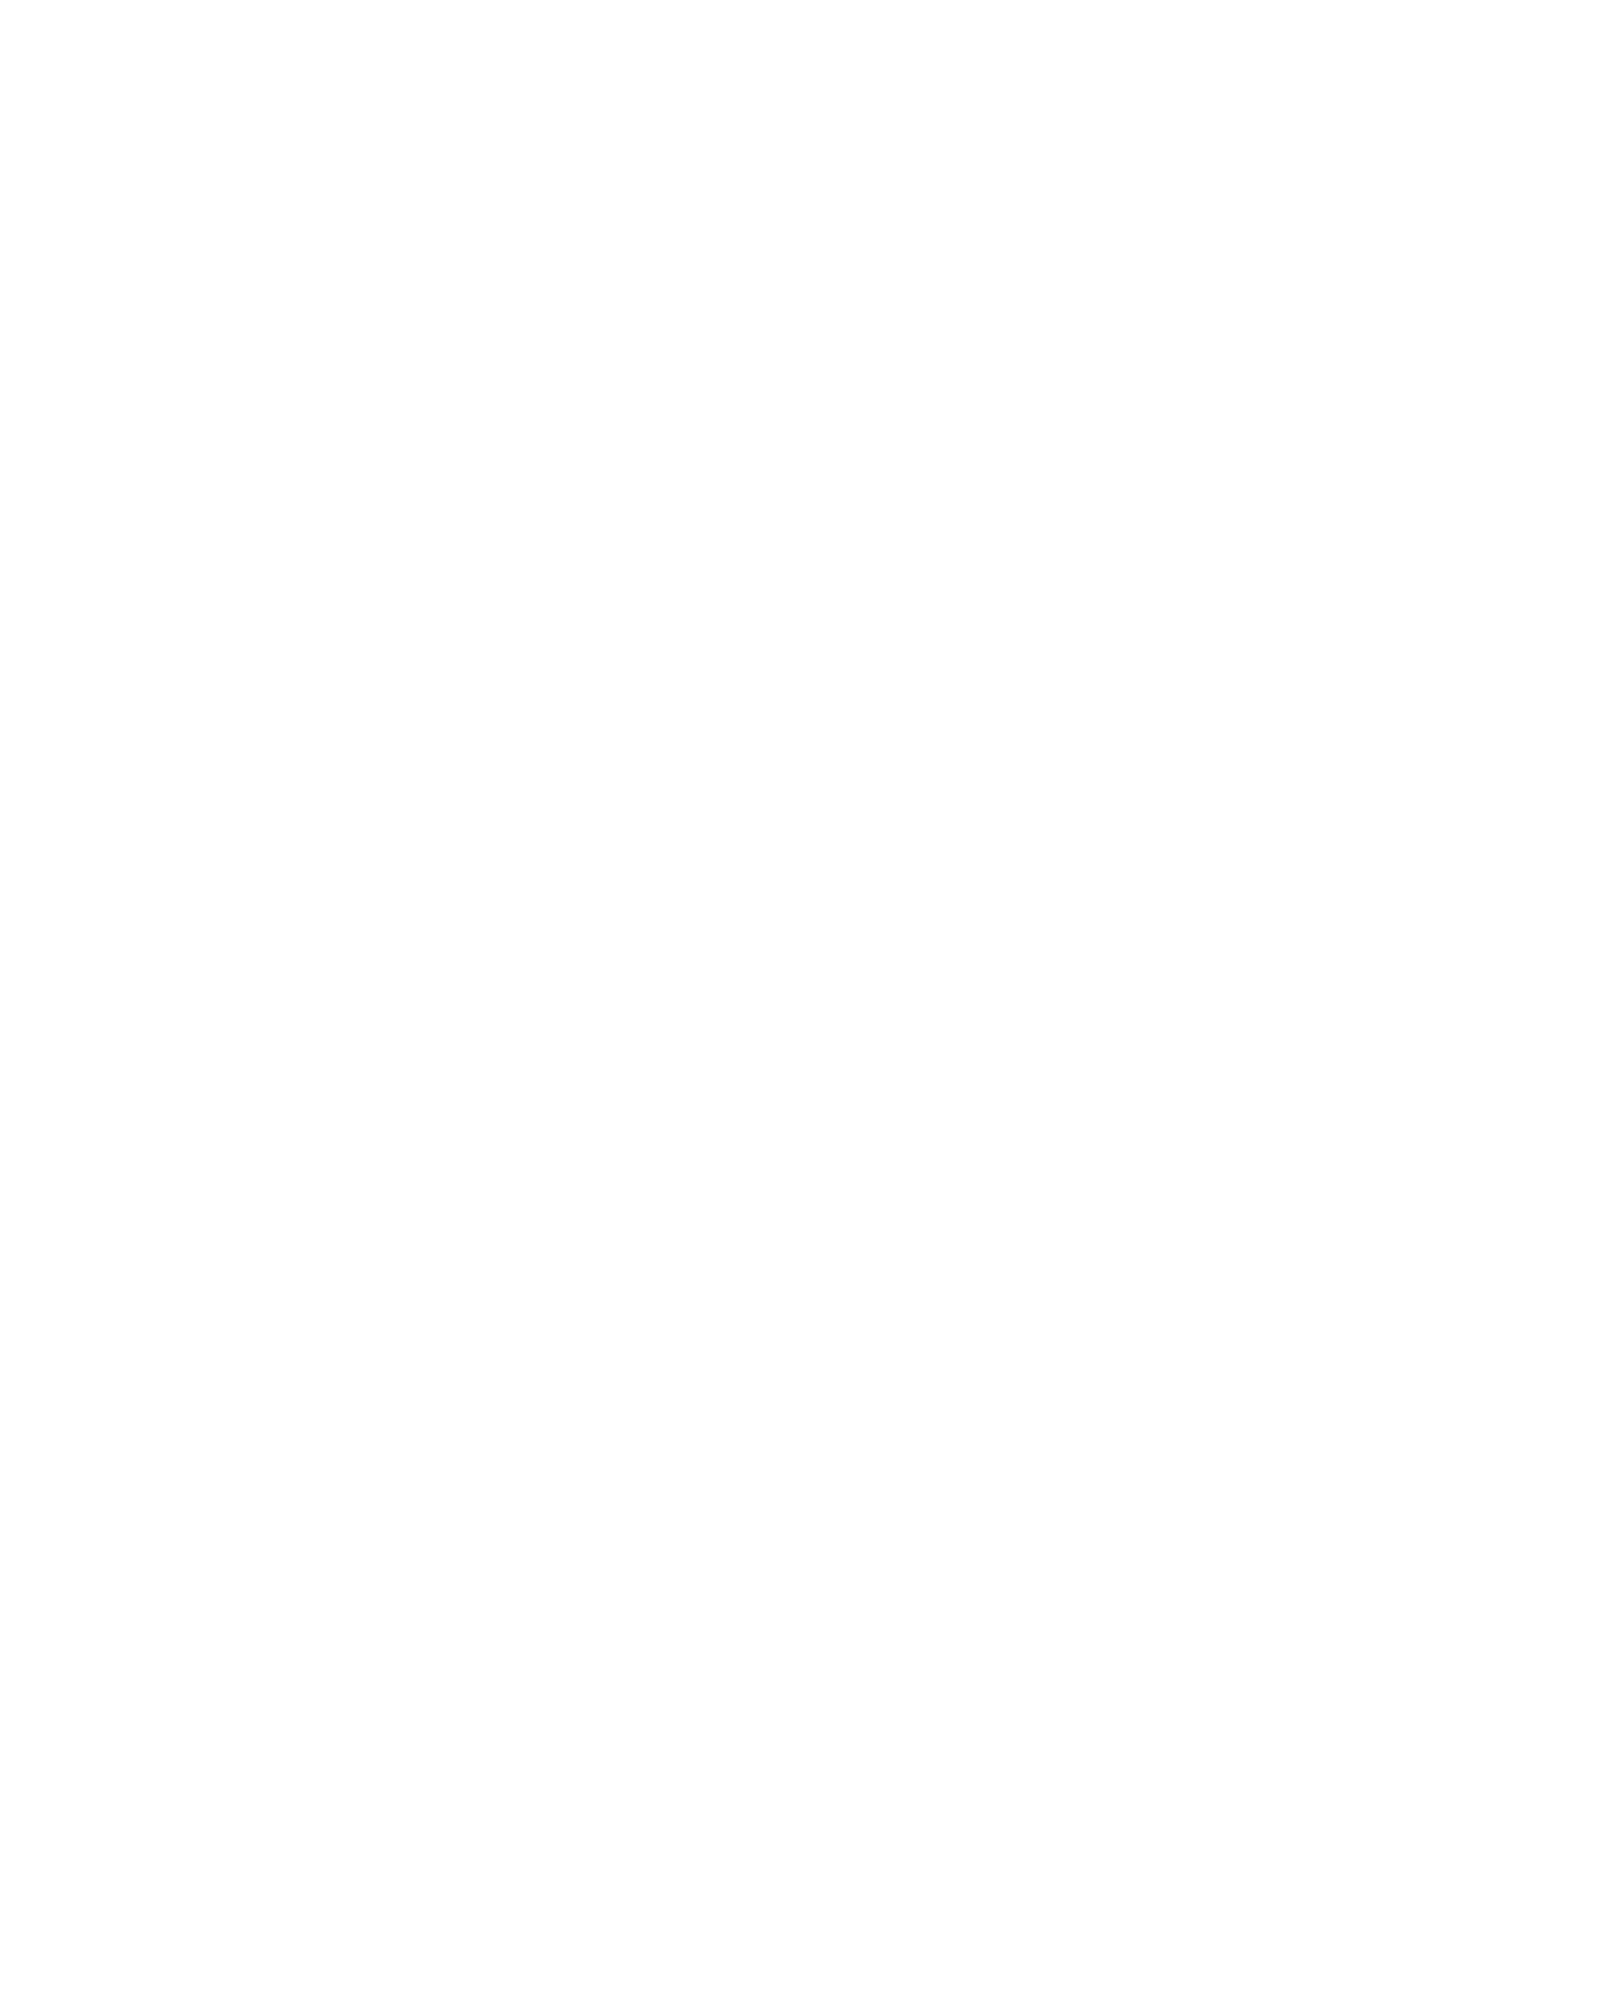

In [5]:
set_theme!(
    fontsize=25,
    Legend=(labelsize=20,),
    Axis=(
        xgridvisible=false,
        ygridvisible=false,
    ),
)

fig = Figure(size=(800, 1000))

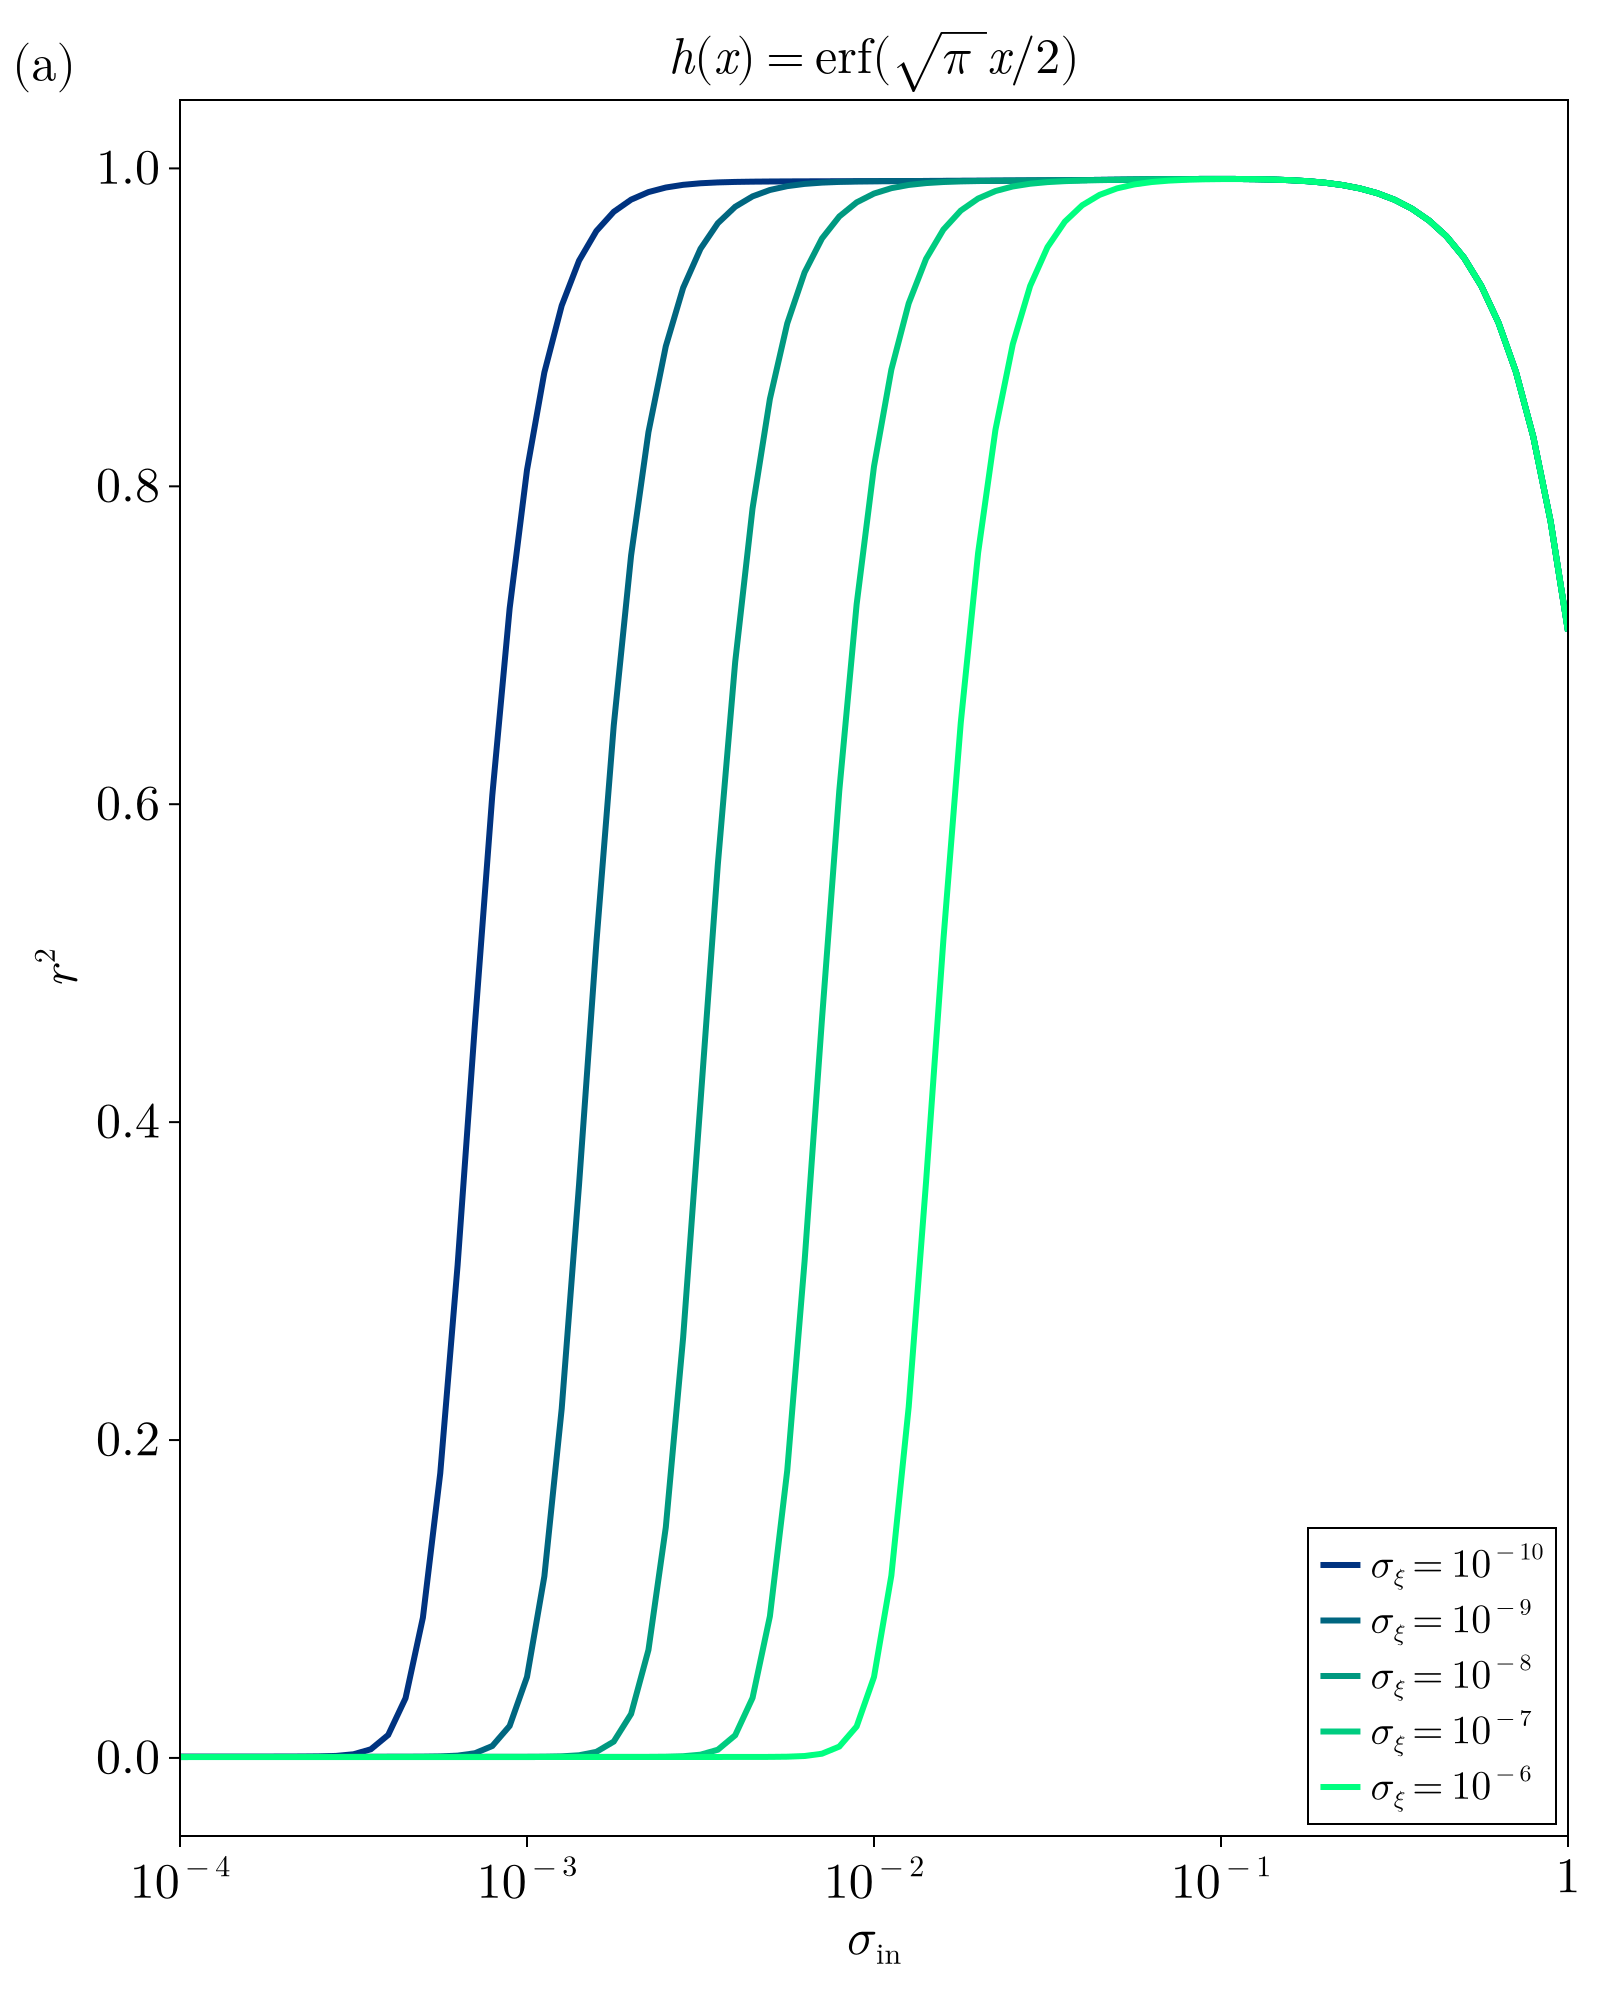

In [6]:
ax = Axis(fig[1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"h(x) = \mathrm{erf}(\sqrt{\pi} x / 2)")

xlims!(ax, 1e-4, 1)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid, r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[1, 1, TopLeft()], L"\mathrm{(a)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

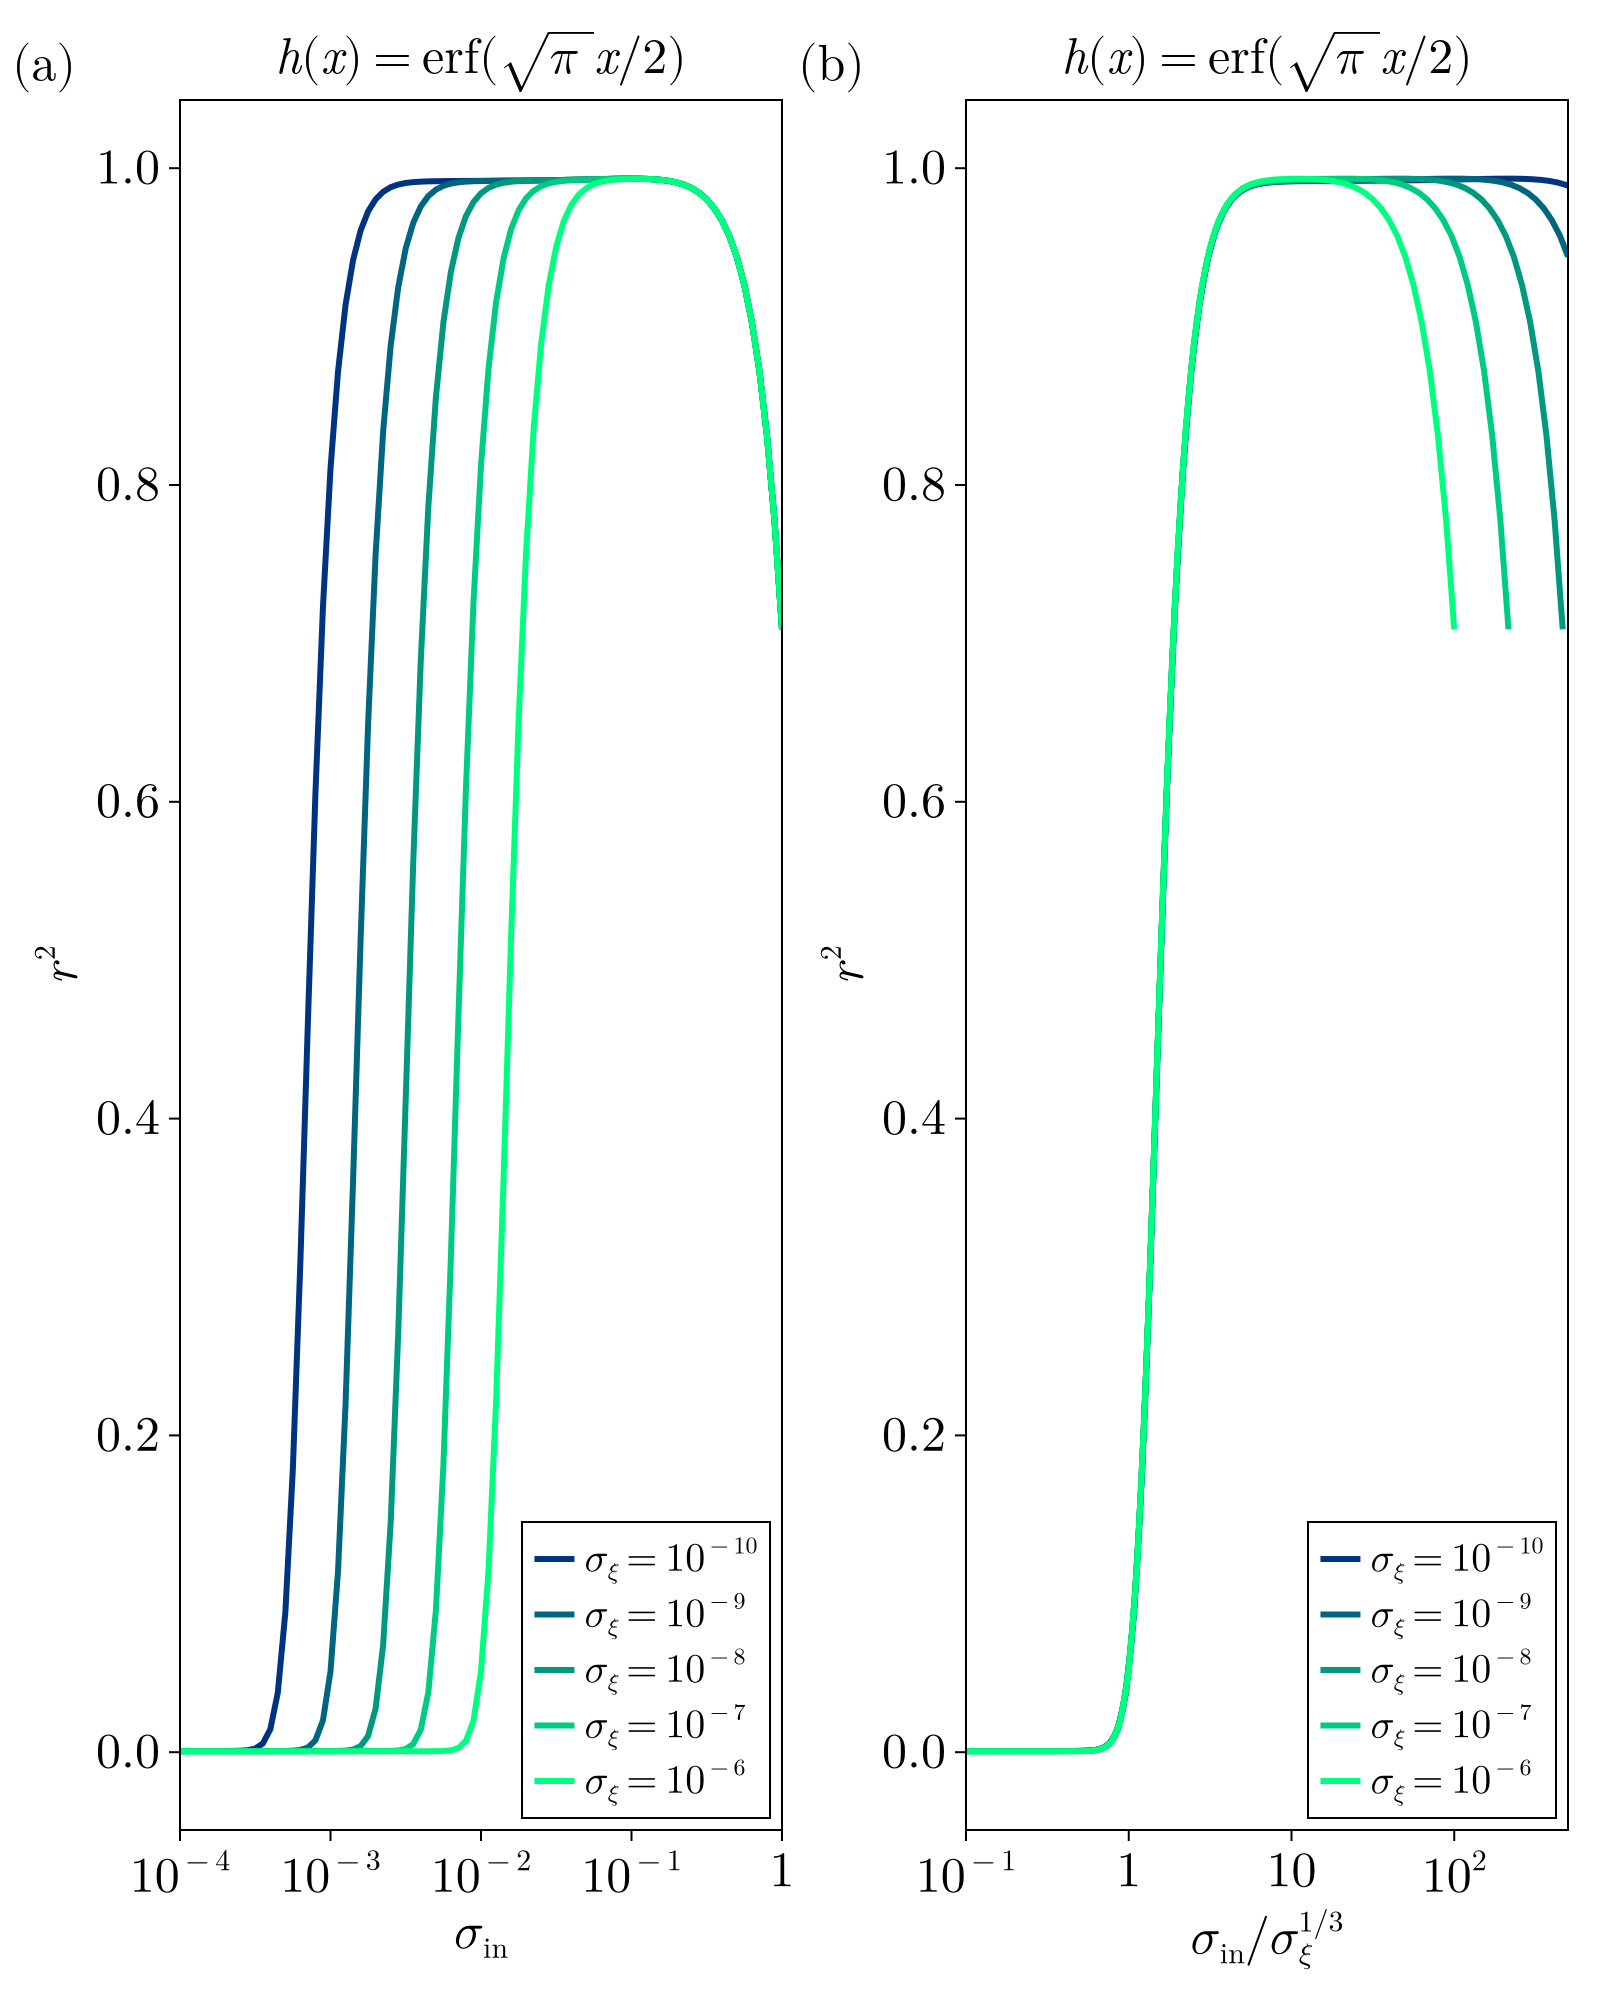

In [7]:
ax = Axis(fig[1, 2];
    xlabel=L"\sigma_{\mathrm{in}} / \sigma_{\xi}^{1/3}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-1, 1, 1e1, 1e2], [L"10^{-1}", L"1", L"10", L"10^2"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"h(x) = \mathrm{erf}(\sqrt{\pi} x / 2)")

xlims!(ax, 1e-1, 5e2)

lines!(ax, input_std_grid * (1e-10 ^ (-1/3)), r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid * (1e-9 ^ (-1/3)), r2_av_list[2], label=L"\sigma_{\xi} = 10^{-9}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid * (1e-8 ^ (-1/3)), r2_av_list[3], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid * (1e-7 ^ (-1/3)), r2_av_list[4], label=L"\sigma_{\xi} = 10^{-7}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid * (1e-6 ^ (-1/3)), r2_av_list[5], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[1, 2, TopLeft()], L"\mathrm{(b)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

In [8]:
# --- Load and average data (fifth) ---

input_std_grid = read_from_file("data//appendix//activation_fifth_noise_scaling//1_input_std_grid.txt")[:, 1]

noise_std_list = ["1e-10", "1e-8", "1e-6", "1e-4"]
r2_av_list = []

for noise_std in noise_std_list
    filename = "data//appendix//activation_fifth_noise_scaling//r2_fifth_N=600_noise=$(noise_std)_delay=5"
    r2_av = load_average(filename, 20)[:, 1]
    push!(r2_av_list, r2_av)
end
r2_av_list[1]

61-element Vector{Float64}:
 0.0007482479671253384
 0.0007520673474215462
 0.000754325943365373
 0.0007551042359712952
 0.0007545390406520567
 0.0007528246862704454
 0.000750228673391826
 0.0007471518452013038
 0.0007443327040084592
 0.0007436180542048256
 ⋮
 0.994632957621719
 0.9955480573947103
 0.996390298003021
 0.9969911610121113
 0.9973810486137795
 0.9975618704472607
 0.9975731979163791
 0.9976512907286414
 0.9975874626194375

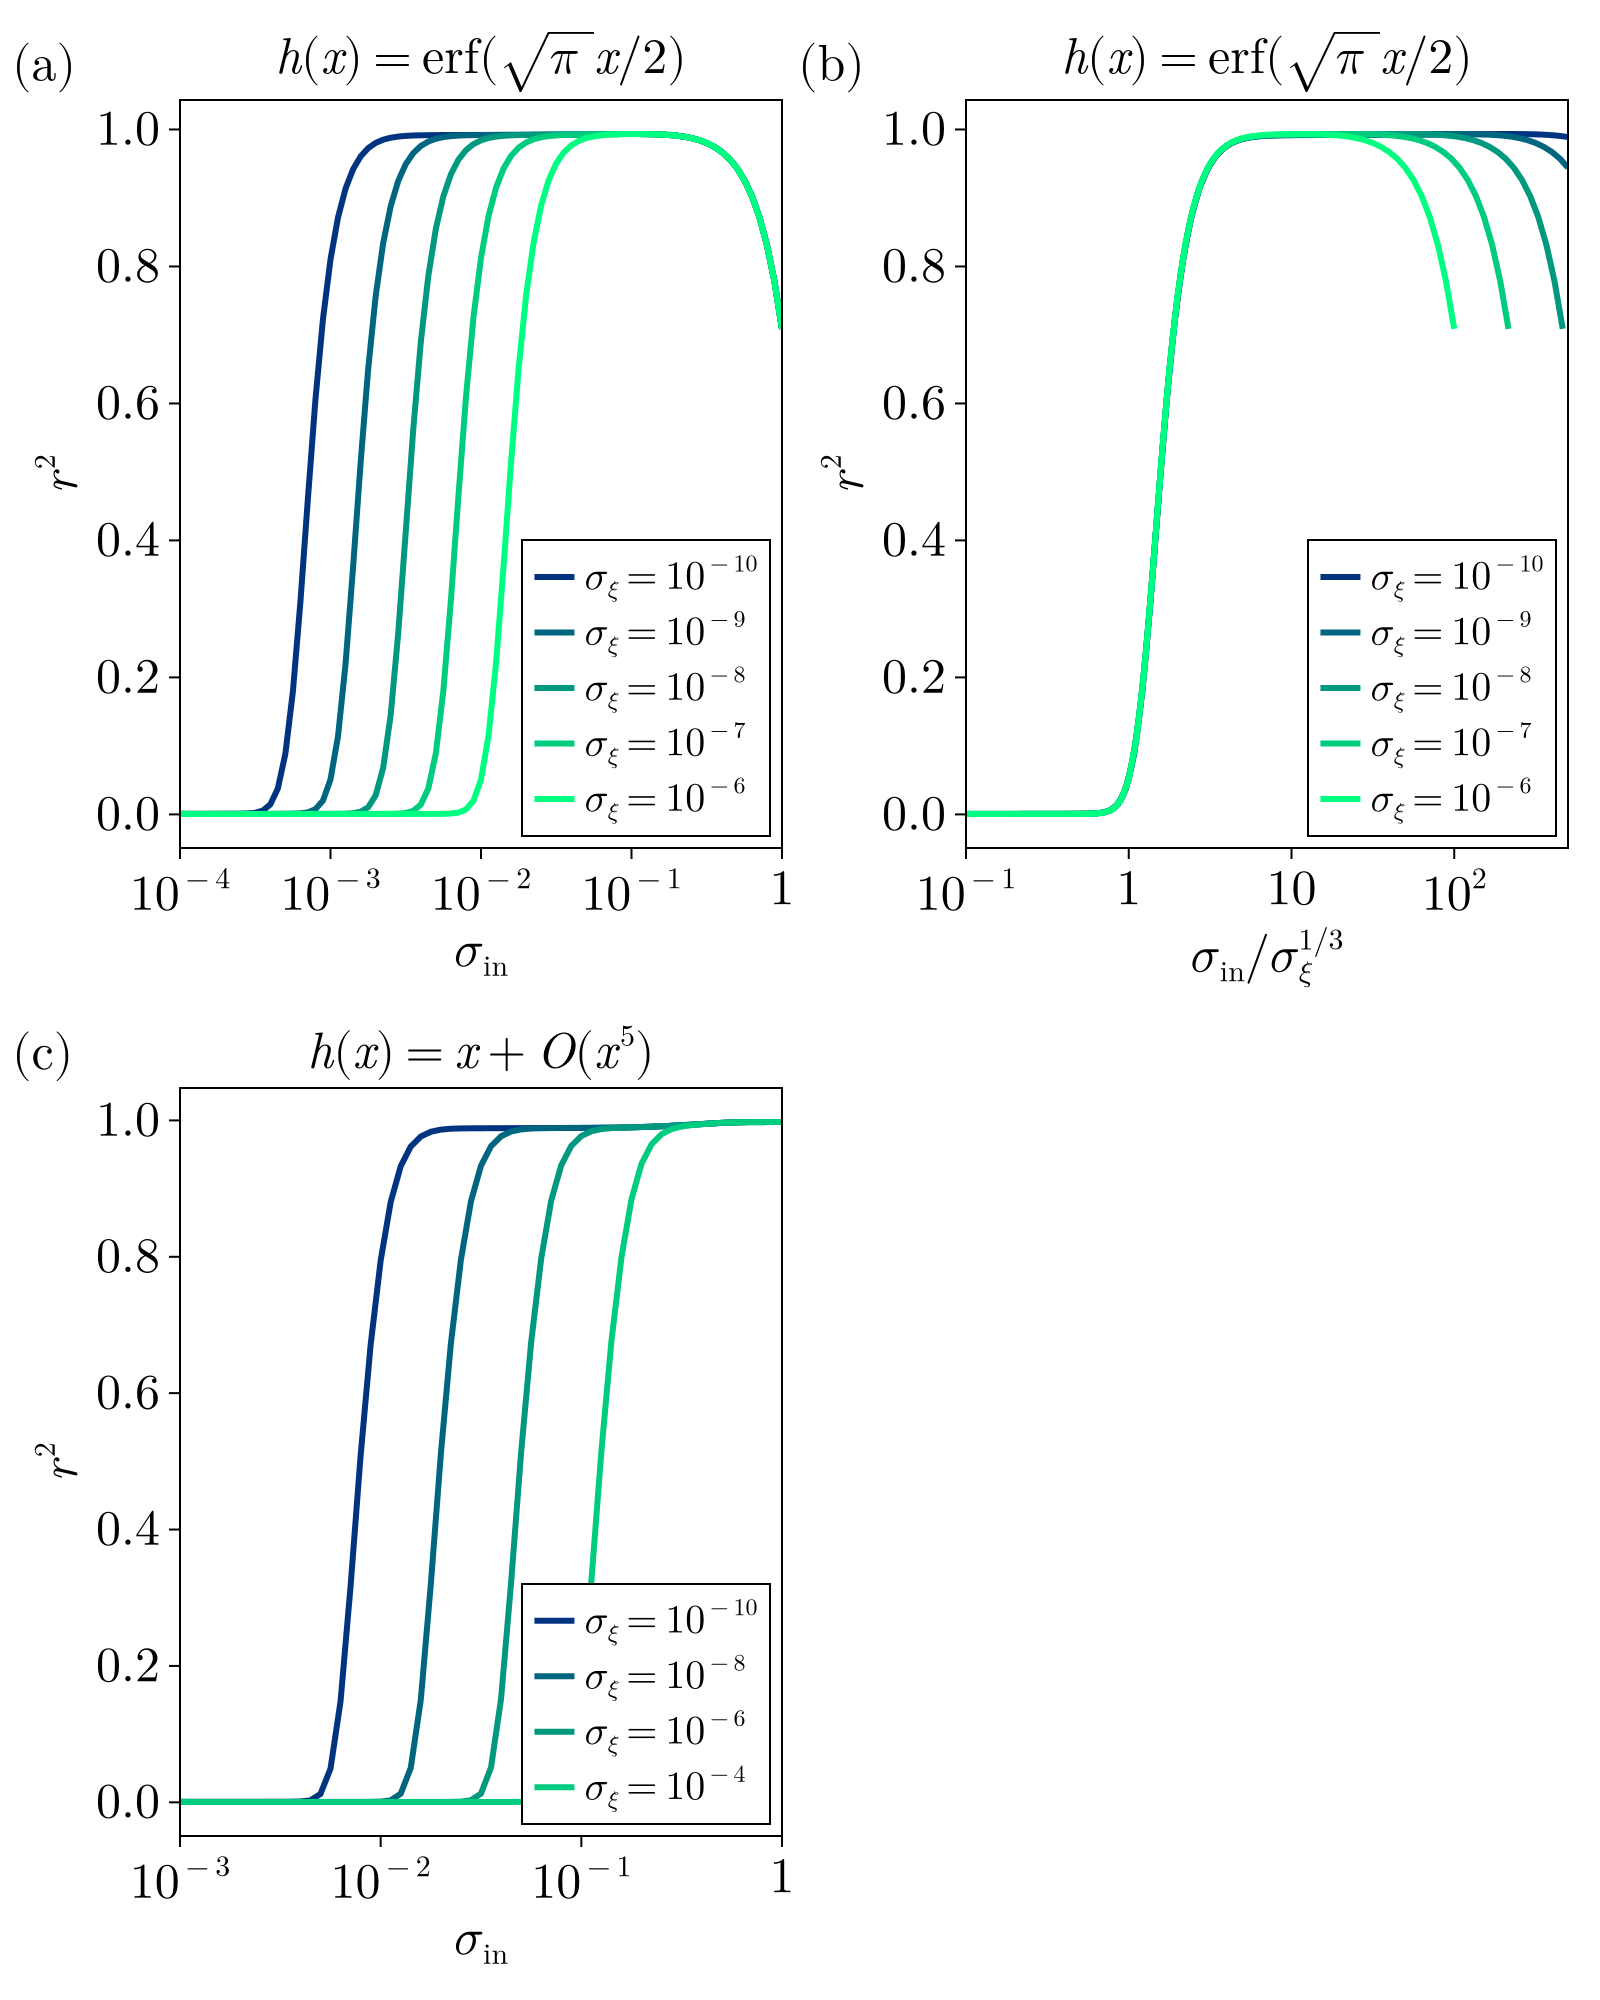

In [9]:
ax = Axis(fig[2, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-3, 1e-2, 1e-1, 1], [L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"h(x) = x + O(x^5)")

xlims!(ax, 1e-3, 1)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\sigma_{\xi} = 10^{-4}", linewidth=3, color=RGBf(0, 0.8, 0.5))

axislegend(ax; position=:rb)

Label(fig[2, 1, TopLeft()], L"\mathrm{(c)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

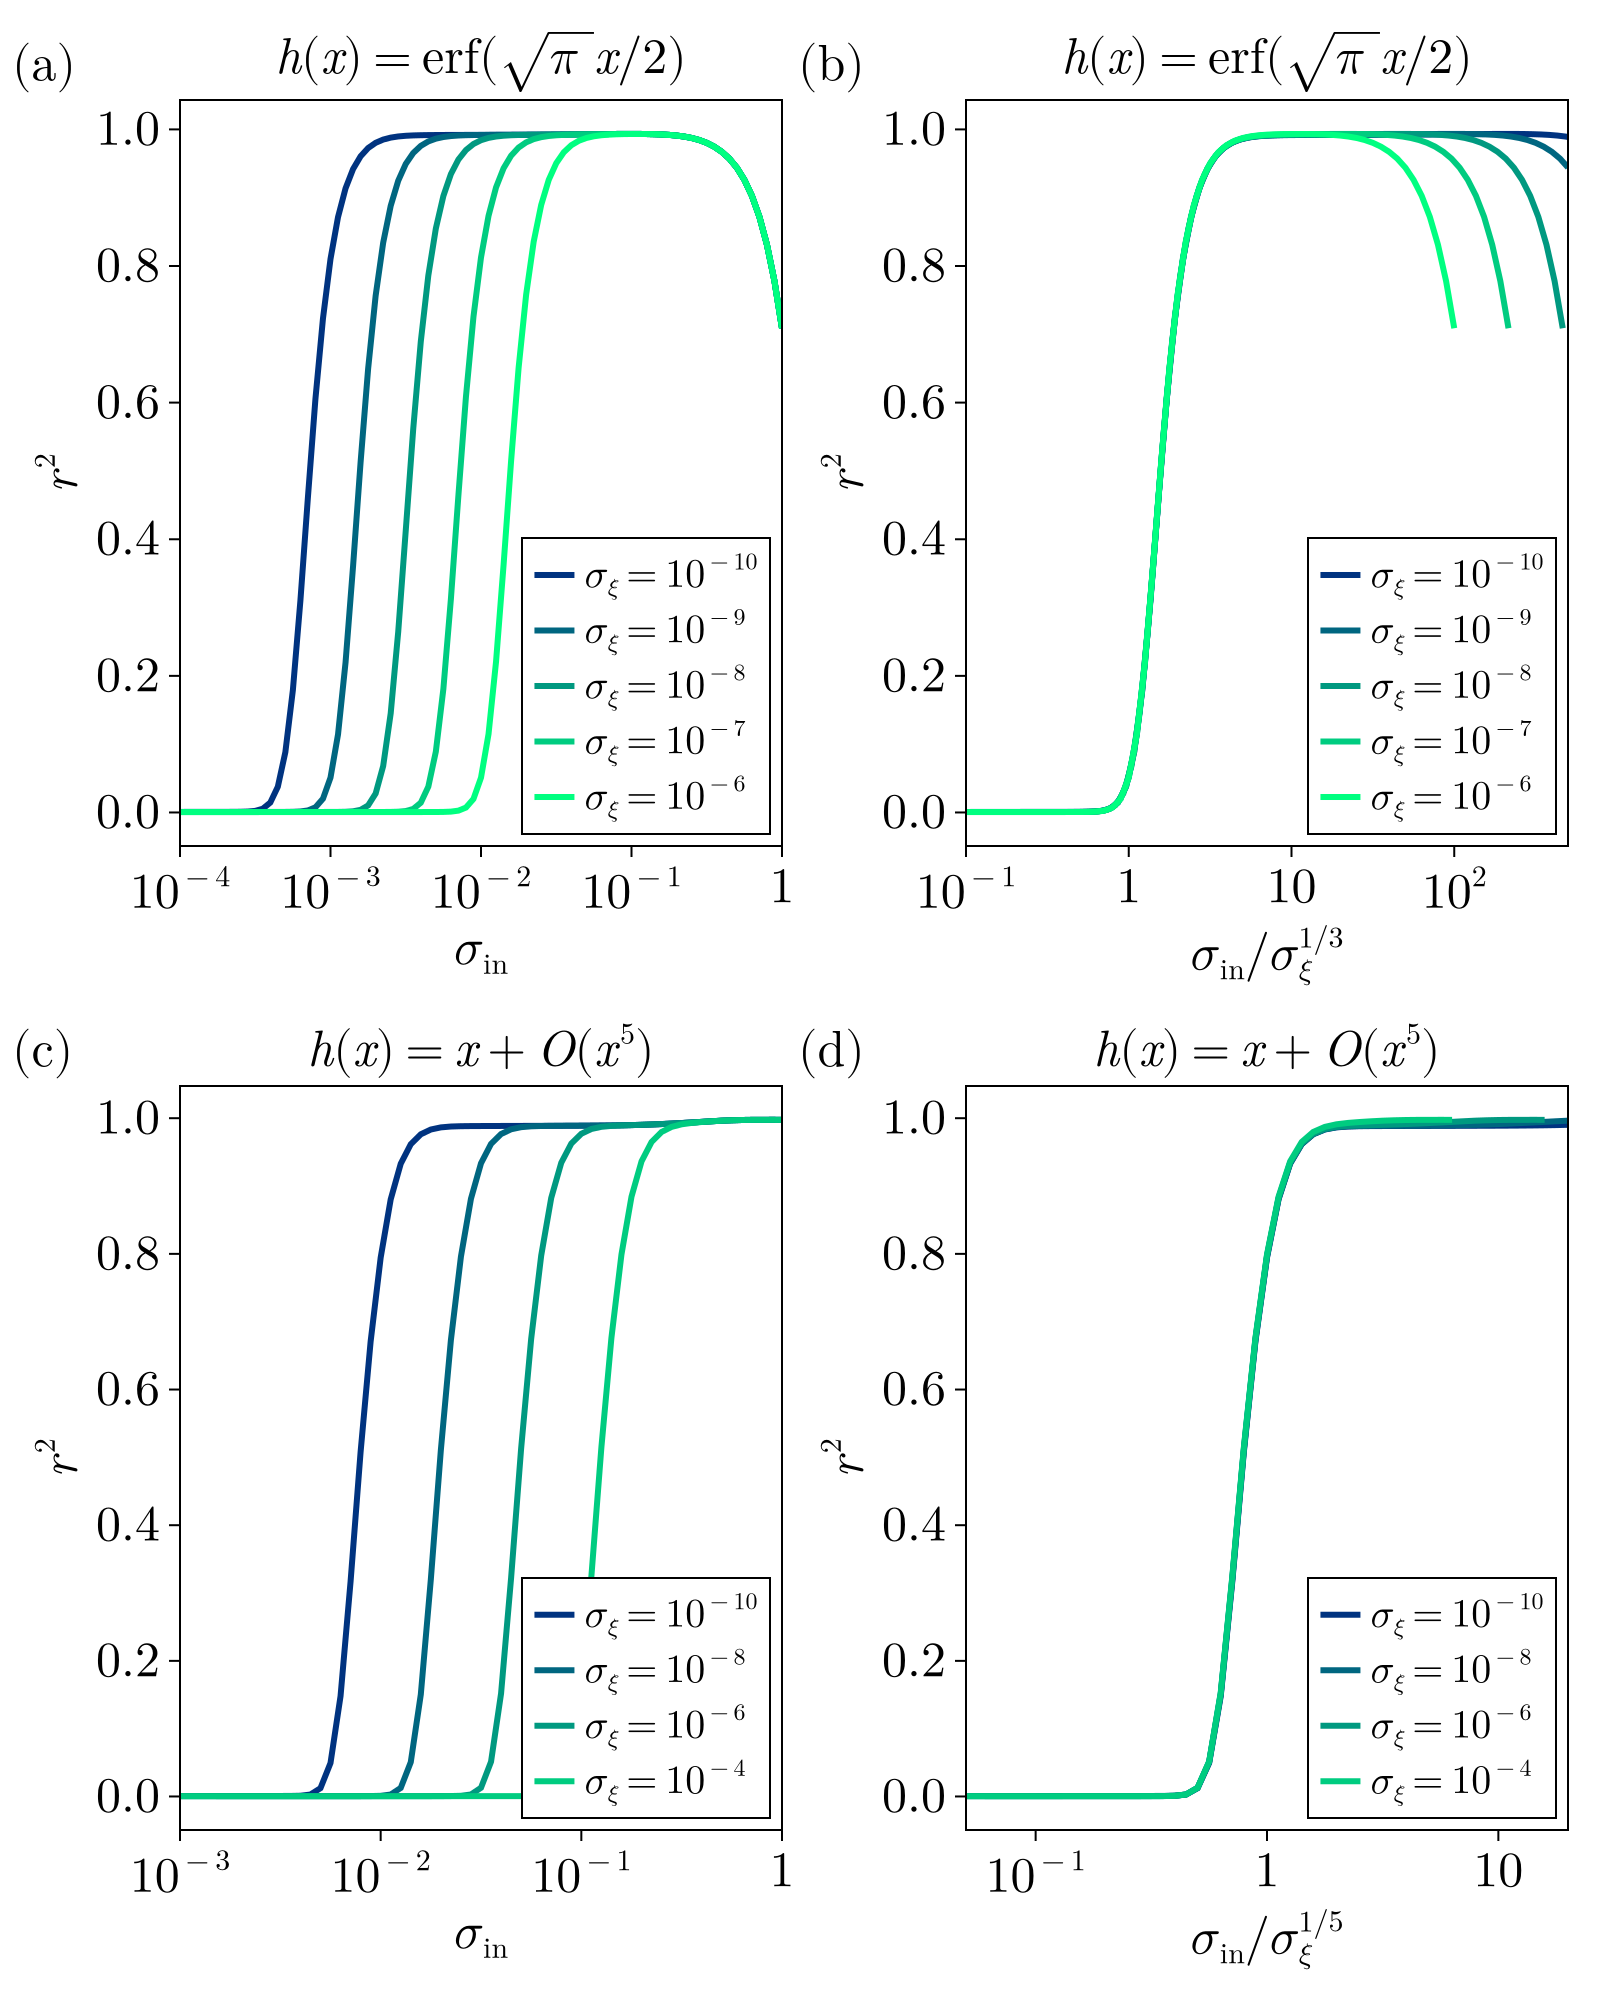

In [10]:
ax = Axis(fig[2, 2];
    xlabel=L"\sigma_{\mathrm{in}} / \sigma_{\xi}^{1/5}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-1, 1, 1e1, 1e2], [L"10^{-1}", L"1", L"10", L"10^2"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"h(x) = x + O(x^5)")

xlims!(ax, 5e-2, 20)

lines!(ax, input_std_grid * (1e-10 ^ (-1/5)), r2_av_list[1], label=L"\sigma_{\xi} = 10^{-10}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid * (1e-8 ^ (-1/5)), r2_av_list[2], label=L"\sigma_{\xi} = 10^{-8}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid * (1e-6 ^ (-1/5)), r2_av_list[3], label=L"\sigma_{\xi} = 10^{-6}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid * (1e-4 ^ (-1/5)), r2_av_list[4], label=L"\sigma_{\xi} = 10^{-4}", linewidth=3, color=RGBf(0, 0.8, 0.5))

axislegend(ax; position=:rb)

Label(fig[2, 2, TopLeft()], L"\mathrm{(d)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

In [11]:
# --- Load and average data (PL) ---

input_std_grid = read_from_file("data//appendix//activation_PL_noise_scaling//1_input_std_grid.txt")[:, 1]

noise_std_list = ["1e-4", "1e-3", "1e-2", "1e-1", "1e0"]
r2_av_list = []

for noise_std in noise_std_list
    r2_data = []
    for seed = 1:20
        filename = "data//appendix//activation_PL_noise_scaling//r2_PL_N=600_noise=" * string(noise_std) * "_delay=5_seed=$(seed).txt"
        r2 = read_from_file(filename)[:, 1]
        push!(r2_data, r2)
    end
    r2_data = hcat(r2_data...)
    r2_av = mean(r2_data, dims=2)[:, 1]
    push!(r2_av_list, r2_av)
end

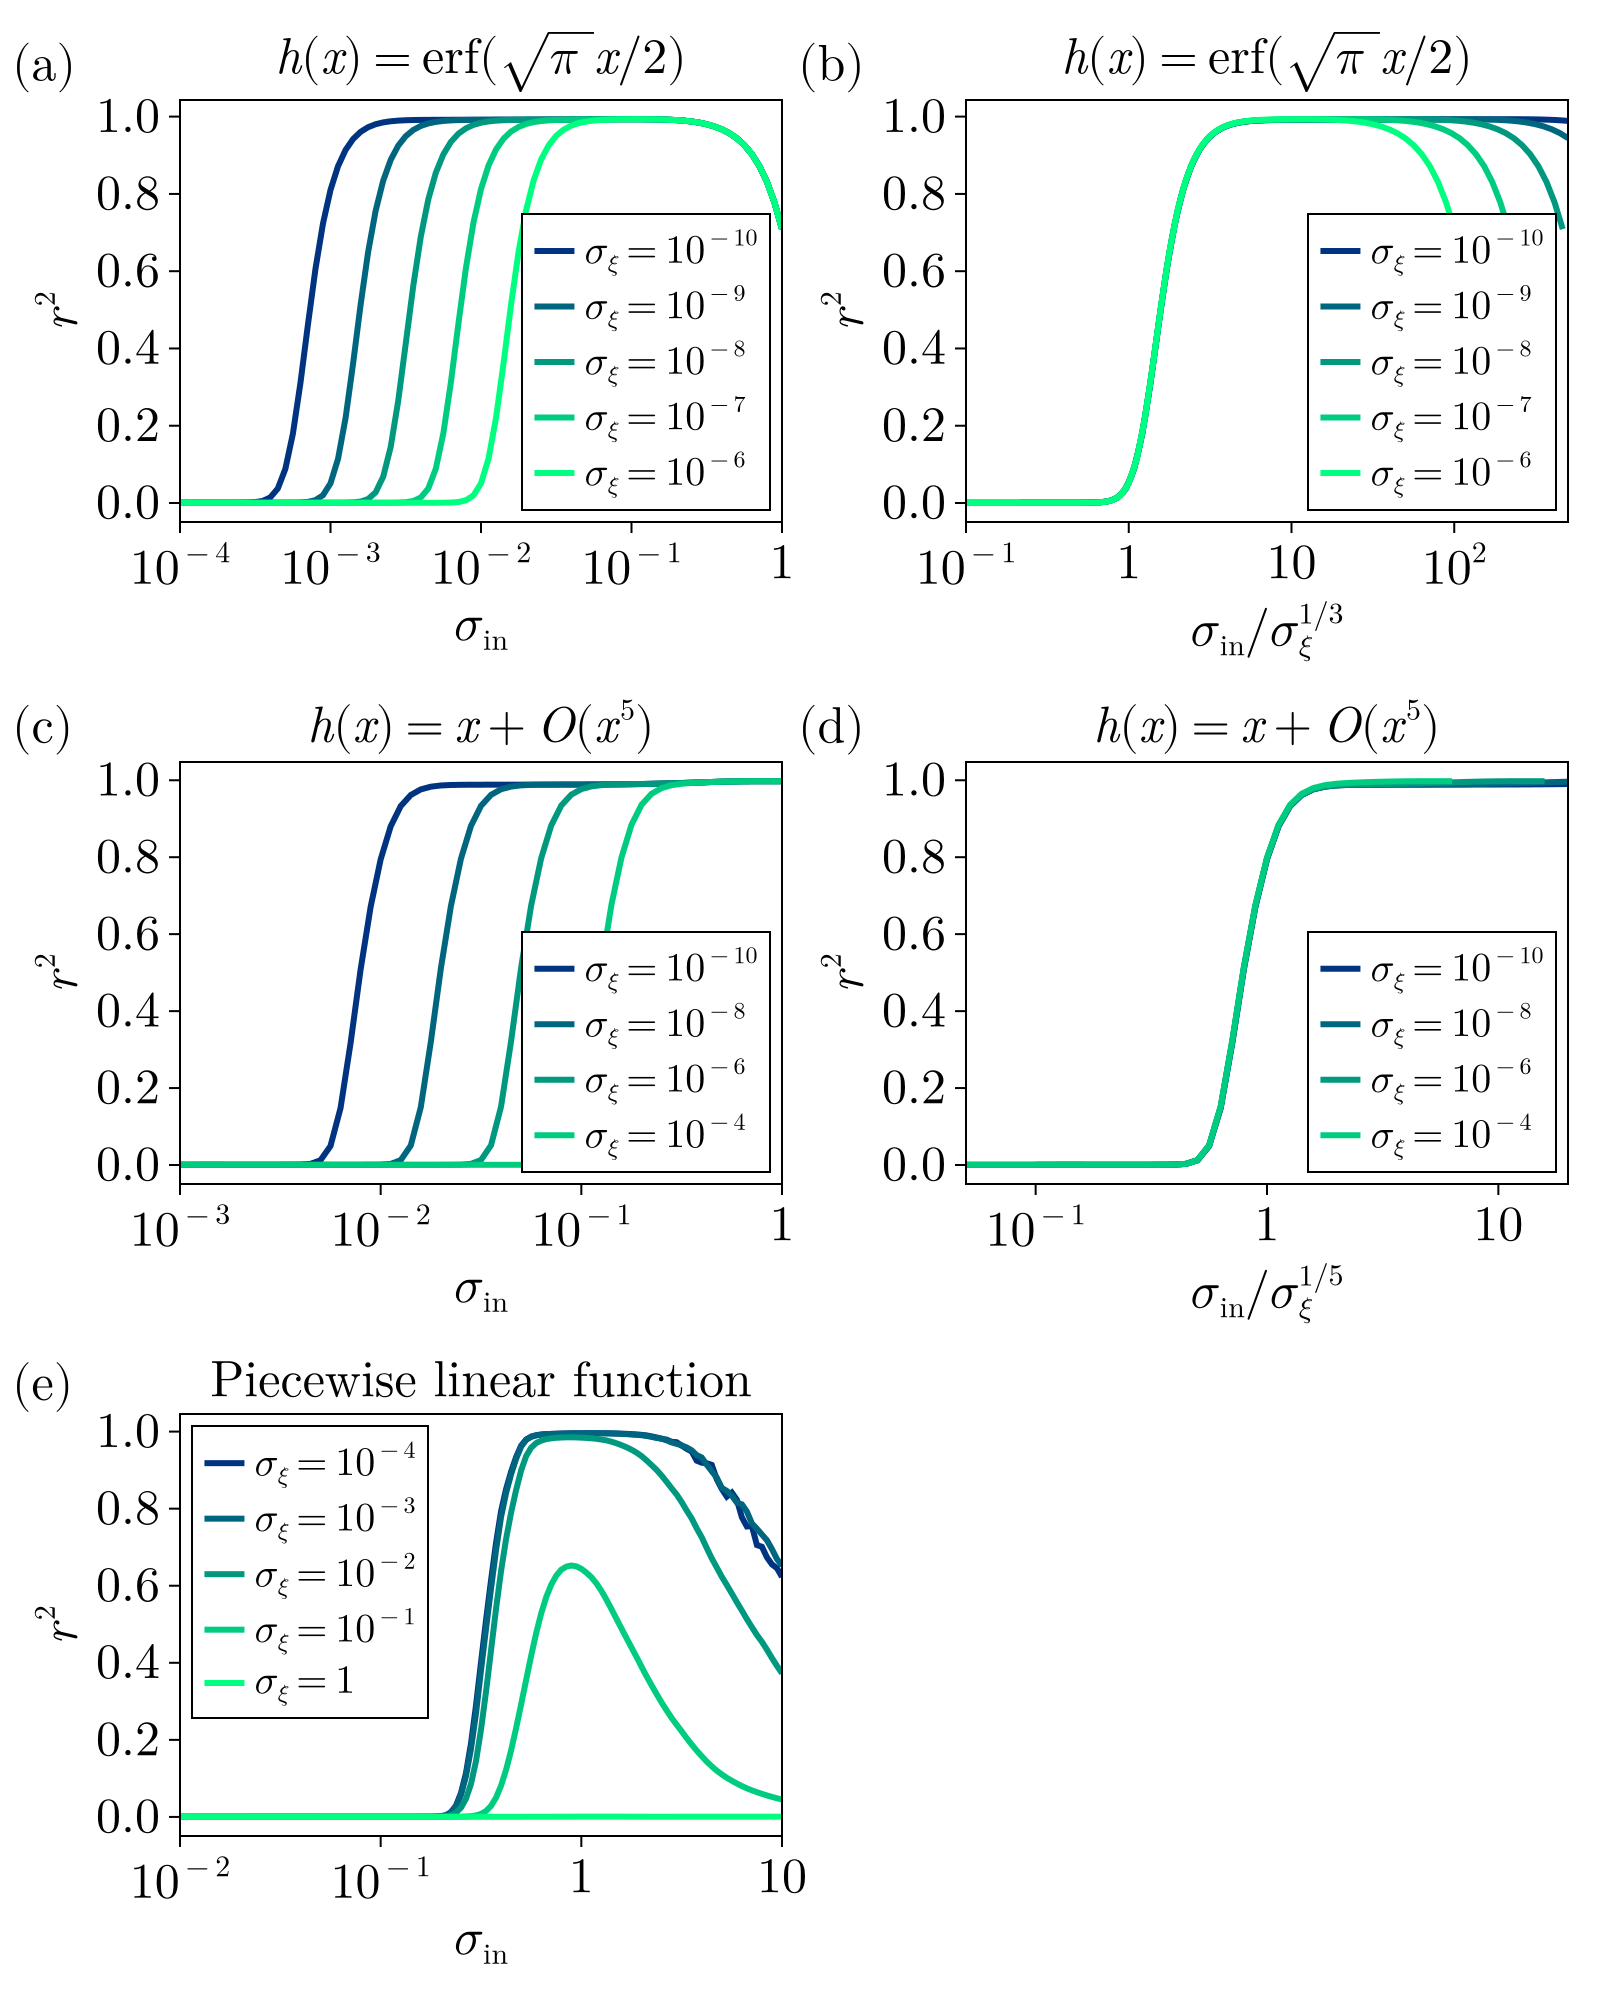

In [12]:
ax = Axis(fig[3, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-2, 1e-1, 1, 10], [L"10^{-2}", L"10^{-1}", L"1", L"10"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Piecewise \ linear \ function}")

xlims!(ax, 1e-2, 10)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\sigma_{\xi} = 10^{-4}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\sigma_{\xi} = 10^{-3}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\sigma_{\xi} = 10^{-2}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\sigma_{\xi} = 10^{-1}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid, r2_av_list[5], label=L"\sigma_{\xi} = 1", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:lt)

Label(fig[3, 1, TopLeft()], L"\mathrm{(e)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

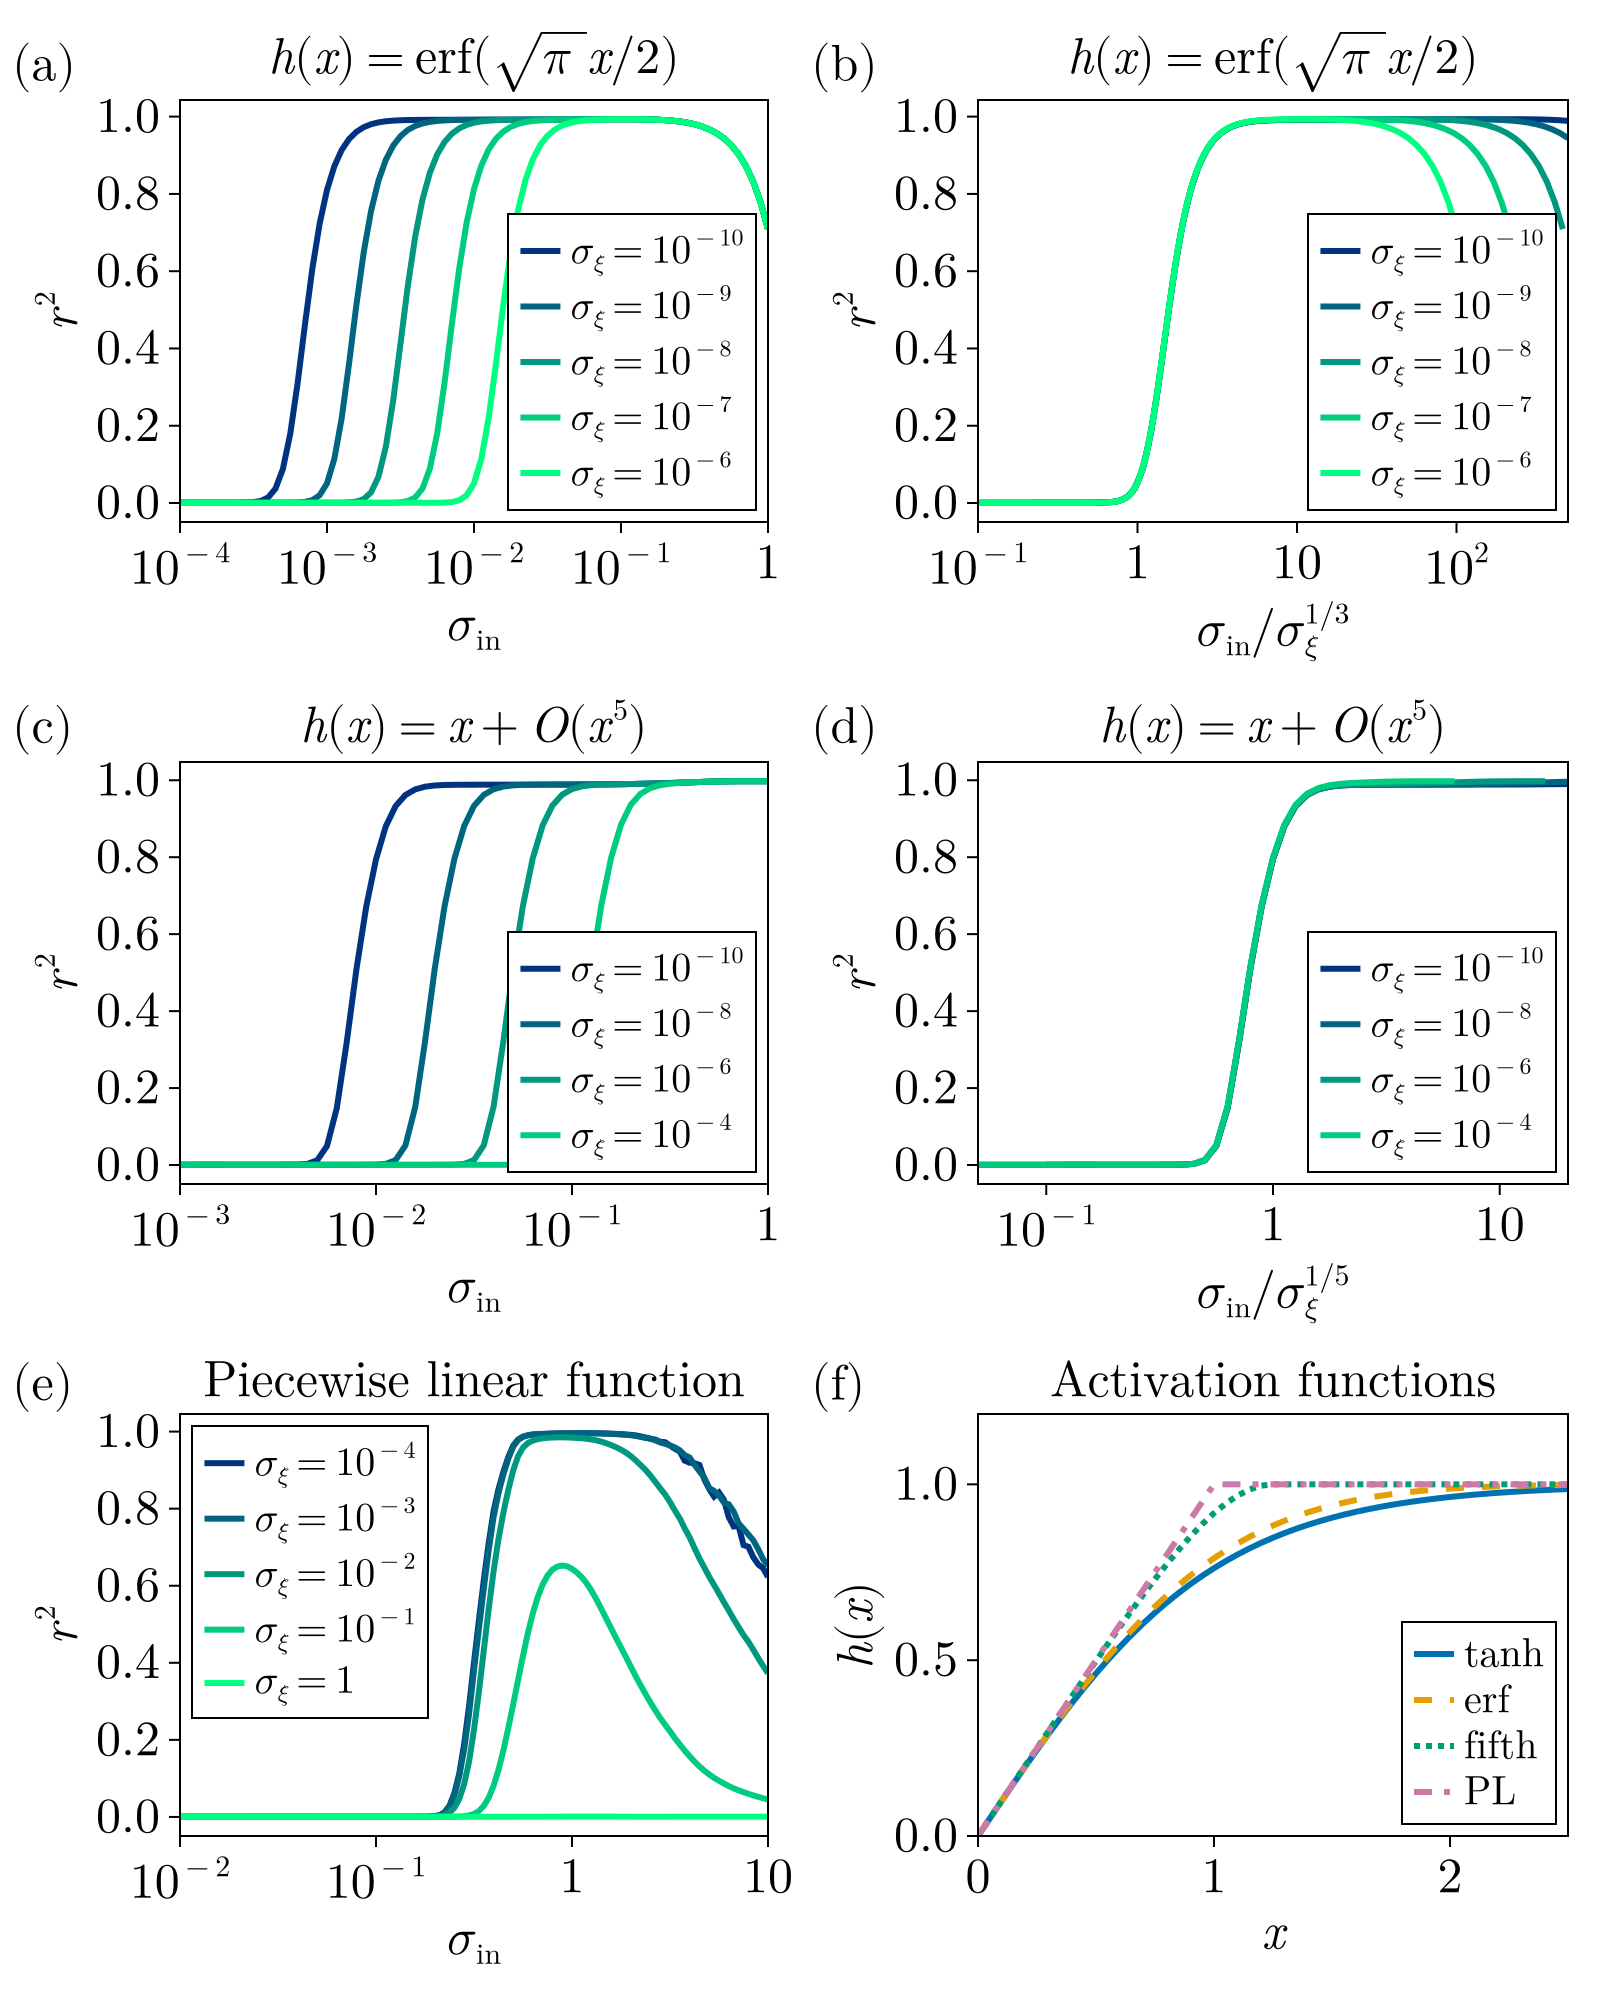

In [13]:
# --- Plot activation functions ---

function h(x, ::Val{:tanh})
    return tanh(x)
end
function h(x, ::Val{:erf})
    return erf(sqrt(pi) * x / 2)
end
function h(x, ::Val{:PL})
    if x < -1.0
        return -1.0
    elseif x > 1.0
        return 1.0
    else
        return x
    end
end
function h(x, ::Val{:fifth})
    if x < -5 / 4
        return -1.0
    elseif x > 5 / 4
        return 1.0
    else
        return x - (4 / 5)^4 * x^5 / 5
    end
end
h(x, op::Symbol) = h(x, Val(op))

xs = -3.0:0.05:3.0
y_tanh = h.(xs, :tanh)
y_erf = h.(xs, :erf)
y_fifth = h.(xs, :fifth)
y_PL = h.(xs, :PL)

ax = Axis(fig[3, 2];
    xlabel=L"x",
    ylabel=L"h(x)",
    xticks=(-2:2, [L"-2", L"-1", L"0", L"1", L"2"]),
    yticks=(-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"]),
    title=L"\mathrm{Activation \ functions}")

xlims!(ax, 0, 2.5)
ylims!(ax, 0, 1.2)

lines!(ax, xs, y_tanh, label=L"\tanh", linewidth=3)
lines!(ax, xs, y_erf, label=L"\mathrm{erf}", linewidth=3, linestyle=:dash)
lines!(ax, xs, y_fifth, label=L"\mathrm{fifth}", linewidth=3, linestyle=(:dot, :dense))
lines!(ax, xs, y_PL, label=L"\mathrm{PL}", linewidth=3, linestyle=(:dashdot, :dense))

axislegend(ax; position=:rb)

Label(fig[3, 2, TopLeft()], L"\mathrm{(f)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

colgap!(fig.layout, 1, Relative(0.05))

fig

In [14]:
save("fig8_activation_noise_scaling.pdf", fig)

CairoMakie.Screen{PDF}
